### Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th.

The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.

The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in.

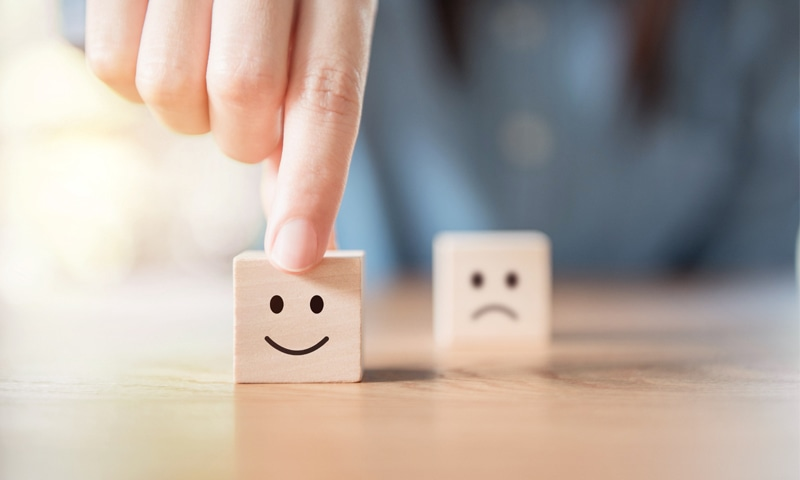

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

About the columns:

Country :

     Name of the country
     
Happiness Rank :

    Rank of the country based on the Happiness Score.

Happiness Score :

     A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest"         
    
Standard Error:
    
    The standard error (SE) of a statistic is the approximate standard deviation of a statistical sample population. The standard error is a statistical term that measures the accuracy with which a sample distribution represents a population by using standard deviation. In statistics, a sample mean deviates from the actual mean of a population; this deviation is the standard error of the mean.
    
Economy:
    
    The extent to which GDP contributes to the calculation of the Happiness Score.
    
Family:
    
    The extent to which Family contributes to the calculation of the Happiness Score
    
Health:
    
    The extent to which Life expectancy contributed to the calculation of the Happiness Score
    
Freedom:
    
    The extent to which Freedom contributed to the calculation of the Happiness Score
    

Trust:
    
    The extent to which Perception of Corruption contributes to Happiness Score


Generosity:
   
    The extent to which Generosity contributed to the calculation of the Happiness Score
   

Dystopia Residual:   
    
    The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.
   

    


In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

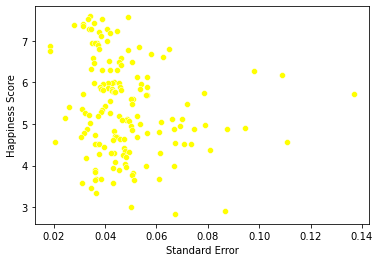

In [5]:
import seaborn as sns
sns.scatterplot(x='Standard Error',y='Happiness Score',data=df,color='yellow')

**We can see the standard error is majorly distributed in the range of 0.3 to 0.6, from this we find that some outliers are present.**

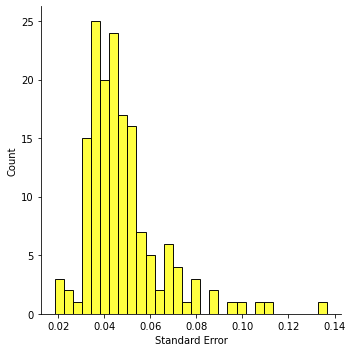

In [6]:
sns.displot(df, x="Standard Error", bins=30, color='yellow')

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

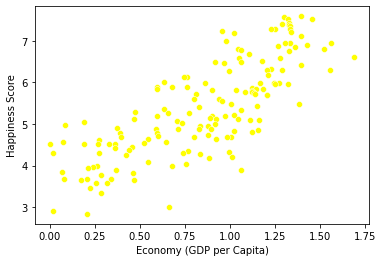

In [7]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df, color='yellow')

**We can see the Economy (GDP per Capita) is majorly distributed in the range of 0.25 to 1.3, from this we find that some outliers are present.**

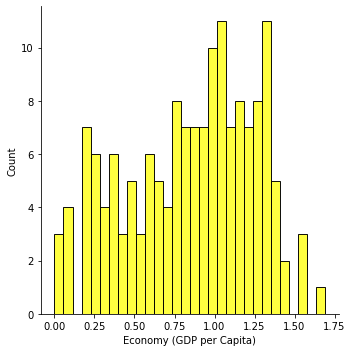

In [8]:
sns.displot(df, x="Economy (GDP per Capita)", bins=30, color='yellow')

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

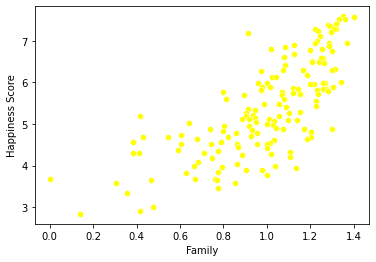

In [9]:
sns.scatterplot(x='Family',y='Happiness Score',data=df, color='yellow')

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

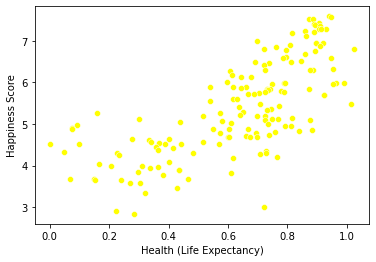

In [10]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df, color='yellow')

**We can see the Health (Life Expectancy) is majorly distributed in the range of 0.3 to 1.**

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

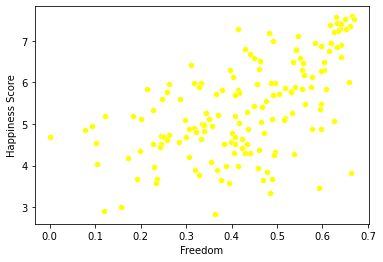

In [11]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=df, color='yellow')  

**We can see the Freedom is majorly distributed in the range of 0.1 to 0.7.**

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

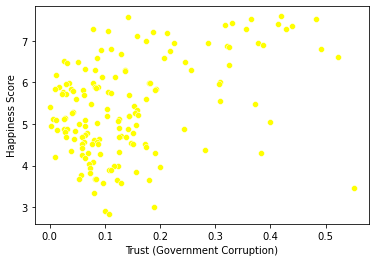

In [12]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df, color='yellow')  

**We can see the Trust (Government Corruption) is majorly distributed in the range of 0.0 to 0.2, from this we find that some outliers are present**

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

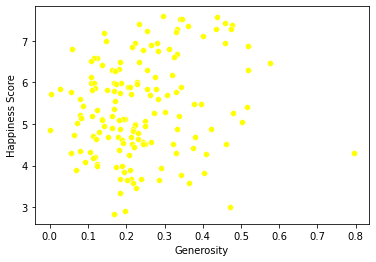

In [13]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df, color ='yellow')  

**We can see the Generosity is majorly distributed in the range of 0.0 to 0.6.**

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

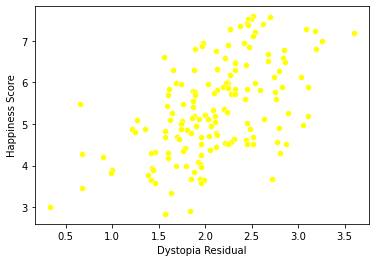

In [14]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df, color='yellow')

**We can see the Dystopia Residual is majorly distributed in the range of 1.25 to 3, from this we find that some outliers are present.**

In [15]:
# lets make a new datasets, drop few columns as of no use.

df1=df.iloc[:,3:12]

In [16]:
df1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### CORRELATION:

In [17]:
# lets find the correlation between them.

df1.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


**As we can see that Correlation between Standard Error and Happiness Score is -ve so we can easily drop the standard Error.**

In [18]:
df1.corr()['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

#### Correlation Heatmap

<AxesSubplot:>

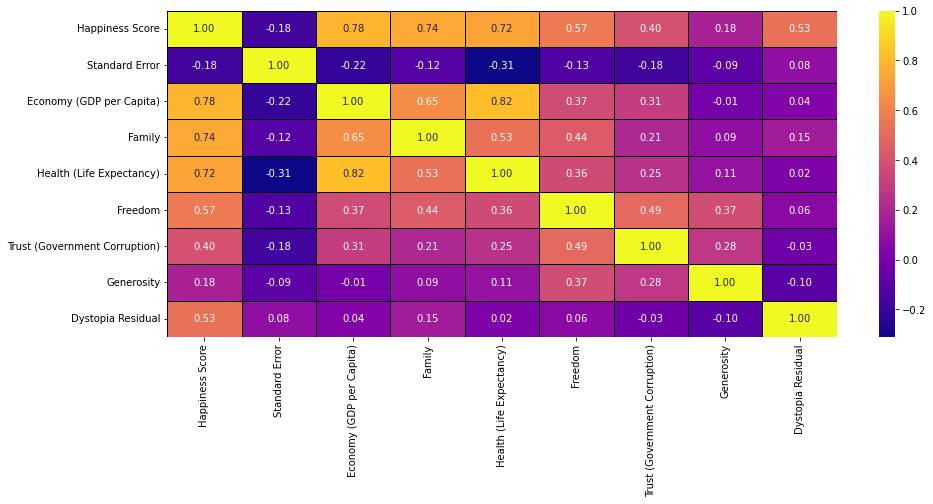

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f',cmap='plasma' ) 

Observations: 

* Standard error is negatively correlated to Happiness Score.

* Economy is 78% correlated to Happiness Score which is very good relation.

* Family is 74% correlated to Happiness Score which is  good relation.

* Health is 72% correlated to Happiness Score which is good relation.     

* Freedom is 57%  correlated to Happiness Score which is good relation  

* Trust is 40% correlated to Happiness Score which is  medium relation.

* Generosity is only 18% correlated to Happiness Score which is not that good relation.

* Dystopia is having medium relation.

* Max correlation: Economy

* Min correlation: Generosity

* Negative correlation: Standard error


In [20]:
df1.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


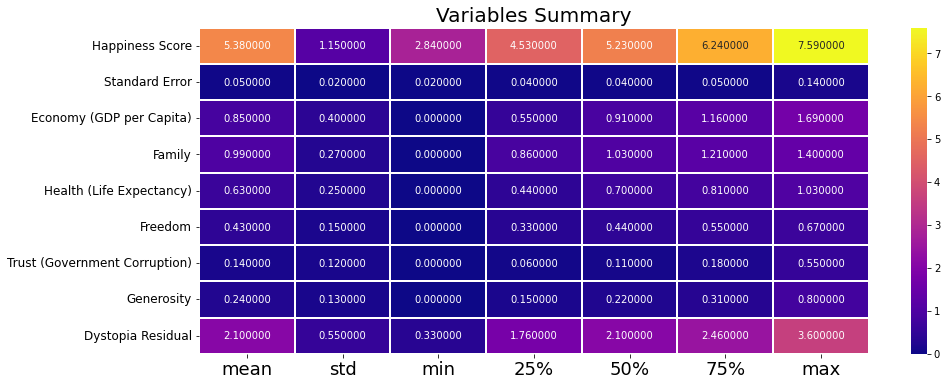

In [21]:
plt.figure(figsize=(15,6))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f',cmap='plasma')

plt.xticks(fontsize=18)
plt.yticks(fontsize=12)

plt.title("Variables Summary",fontsize=20)
plt.show()

From above ploting we can easily look at mean, std-deviation, min and max values of each column, it helps in further data cleaning.



Total no of rows in dataset:


    1.158 rows
    2.9 columns
 
Standard Error:


    1.mean= 0.05
    2.std=  0.02
    3.min=  0.02
    4.max=  0.14
    
Economy (GDP per Capita):


    1.mean= 0.85
    2.std=  0.4
    3.min=  0.00
    4.max=  1.69
    
Family:


    1.mean= 0.99
    2.std=  0.27
    3.min=  0.00
    4.max=  1.4

Health (Life Expectancy):


    1.mean= 0.63
    2.std=  0.25
    3.min=  0.00
    4.max=  1.03

Freedom:


    1.mean= 0.43
    2.std=  0.15
    3.min=  0.00
    4.max=  0.67
    
    
Trust (Government Corruption):


    1.mean= 0.14
    2.std=  0.12
    3.min=  0.00
    4.max=  0.55
    
Generosity:


    1.mean= 0.24
    2.std=  0.13
    3.min=  0.00
    4.max=  0.8

Dystopia Residual:


    1.mean= 2.1
    2.std=  0.55
    3.min=  0.33
    4.max=  3.6


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


**From the above code we can have the columns datatype and memory used by the dataframe**

#### Outliers Checking:

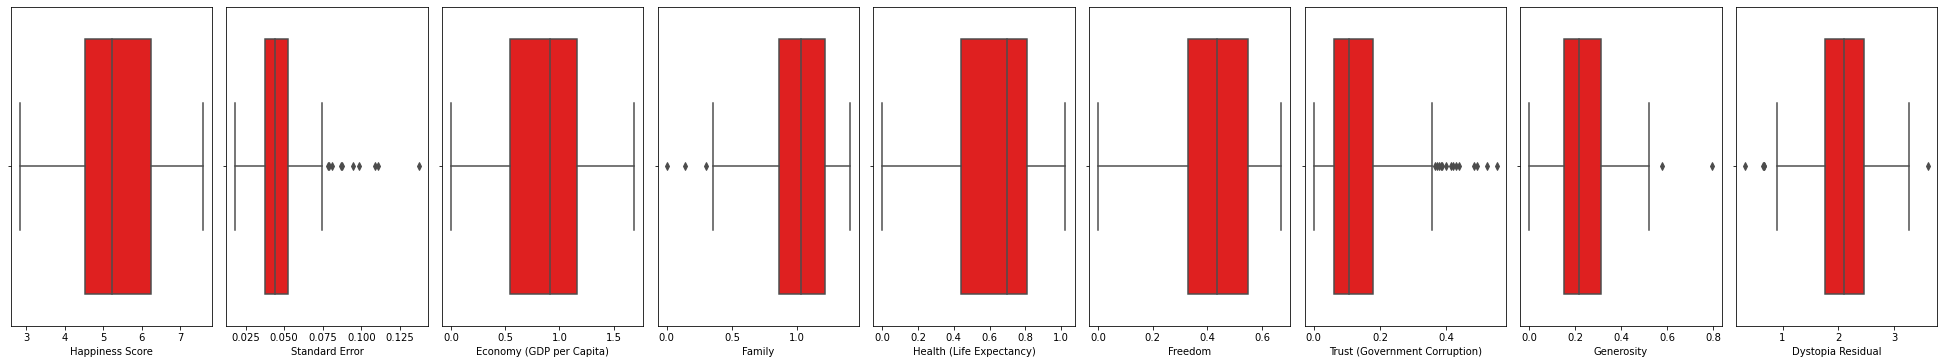

In [23]:
collist=df1.columns.values
ncol=30
nrows=30
plt.figure(figsize=(3*ncol,5*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='red')
    plt.tight_layout()
    

From above ploting we can find that there are outliers are present in:

* Standard Error

* Family

* Trust

* Dystopia Residual

### Skewness:

In [24]:
df1.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

-.05=<x=<+.5 then data is normally distribute
and if range cross then data is skewed
from above we can understand that

Outcome of the skewness:
    threshold value will be +/-0.65.

Skewed columns are

* Standard Error

* Family

* Health

* Trust

* Generosity



#### Normal Distribution Curve:

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

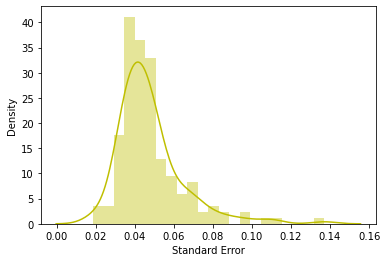

In [25]:
sns.distplot(df1['Standard Error'], color='y')

**The data is not normalized as the building blocks are out of the normal curve.**

<AxesSubplot:xlabel='Family', ylabel='Density'>

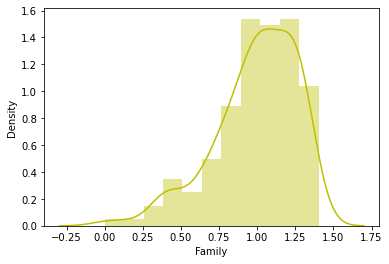

In [26]:
sns.distplot(df1['Family'], color='y')

**The data is not normalized as the building blocks are out of the normal curve.**

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

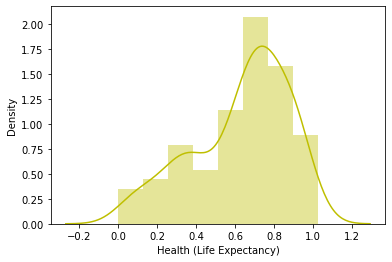

In [27]:
sns.distplot(df1['Health (Life Expectancy)'], color='y')

**The data is not normalized as the building blocks are out of the normal curve.**

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

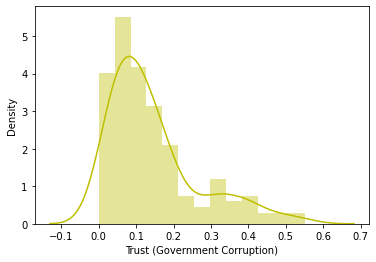

In [28]:
sns.distplot(df1['Trust (Government Corruption)'], color='y')

**The data is not normalized as the building blocks are out of the normal curve.**

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

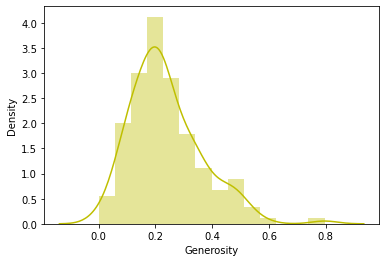

In [29]:
sns.distplot(df1['Generosity'],color='y')

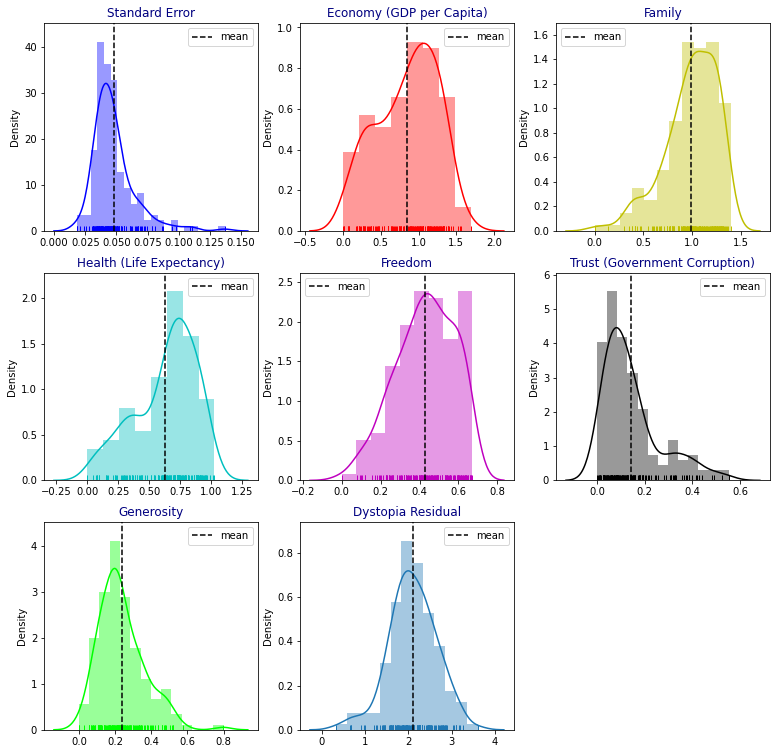

In [30]:
import itertools

cols = ['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
length = len(cols)
cs = ["b","r","y","c","m","k","lime"]
fig = plt.figure(figsize=(13,13))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,3,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

**The data is not normalized as the building blocks are out of the normal curve.**

### The Normal Distribution showed that data is skewed:         

### Data Cleaning

In [31]:
df=df1.drop('Standard Error',axis=1)

In [32]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Removing Outliers

##### Z-Score technique

In [33]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(158, 8)

In [34]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [35]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(158, 8)
(152, 8)


### Percentage data loss:

In [36]:
loss_percentage=(158-152)/158*100
loss_percentage

3.79746835443038

**Checking whether how much outliers are still there. if the outliers there help in the testing the model or not.**

### Dividing data in features and vectors:

In [37]:
x=df_new.iloc[:,1:9]
y=df_new.iloc[:,-8]

In [38]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [39]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 152, dtype: float64

In [40]:
x.shape

(152, 7)

In [41]:
y.shape

(152,)

### Transforming data to remove skewness:

In [42]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [43]:
x 

array([[ 1.49611068,  1.66761865,  1.48143363, ...,  1.8220699 ,
         0.65595135,  0.74453432],
       [ 1.19771756,  2.02101058,  1.52291872, ...,  0.35523024,
         1.57166845,  1.10426166],
       [ 1.27024568,  1.7401529 ,  1.06659878, ...,  1.95457489,
         0.97742359,  0.69531125],
       ...,
       [-1.35114936, -2.09149024, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.4183337 , -2.01503265, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827051, -1.91154624, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

### Lets see what happens when outliers are removed

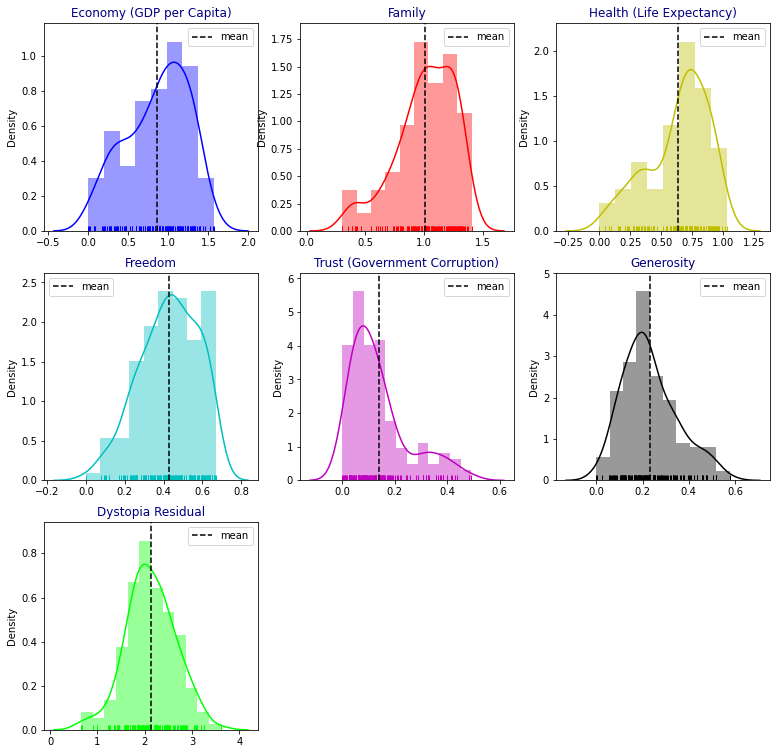

In [44]:
import itertools

cols = ['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
length = len(cols)
cs = ["b","r","y","c","m","k","lime"]
fig = plt.figure(figsize=(13,13))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,3,j+1)
    ax = sns.distplot(df_new[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df_new[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

### Since target column has continuous variable we will use linear classification model.

### Linear-Regressor Model Building

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [47]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 35  The model performs very well
At random_state:- 35
Training r2_score is:- 99.41941493759124
Testing r2_score is:- 99.41805428234099
At random state 84  The model performs very well
At random_state:- 84
Training r2_score is:- 99.42535555613838
Testing r2_score is:- 99.42580861284178
At random state 95  The model performs very well
At random_state:- 95
Training r2_score is:- 99.41878844708879
Testing r2_score is:- 99.4245221915696
At random state 213  The model performs very well
At random_state:- 213
Training r2_score is:- 99.41702291183927
Testing r2_score is:- 99.42000214077392
At random state 251  The model performs very well
At random_state:- 251
Training r2_score is:- 99.42334166617816
Testing r2_score is:- 99.4229933875751
At random state 312  The model performs very well
At random_state:- 312
Training r2_score is:- 99.41502022387795
Testing r2_score is:- 99.41676342164256
At random state 451  The model performs very well
At random_state:- 451
Training r2_score 

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=84)

**from above cross validation, at random state 84 the training score and testing score is same which means at random state 84 model performs optimum.**

In [49]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)*100


99.42580861284178

In [50]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))


Error:
Mean Absolute Error: 0.0688428575663635
Mean Squared Error: 0.007680351228077197
Root Mean Square Error: 0.08763761308979837


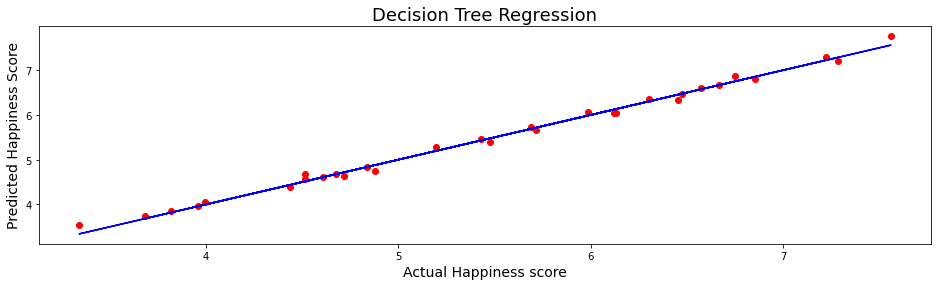

In [51]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')

plt.xlabel('Actual Happiness score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

### As model fits well there is no need of regularization..

### Ensemble Techniques:

##### Decision Tree Regressor

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'splitter': 'best'}


In [54]:
dt = DecisionTreeRegressor(criterion='mae', splitter='best')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=2)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 87.22934048534535
Cross Val Score: -474.71391709384443


In [55]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 0.35600000000000004
Mean Squared Error: 0.17081961290322592
Root Mean Square Error: 0.41330329408707345


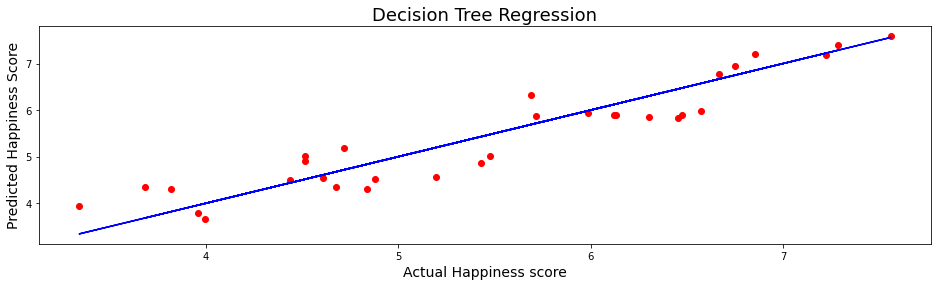

In [56]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')

plt.xlabel('Actual Happiness score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [57]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 200}


In [58]:
rf = RandomForestRegressor(criterion='mae',n_estimators=200)
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)

rfs = r2_score(ytest,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=4)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 93.83498187144048
Cross Val Score: -379.2735067983548


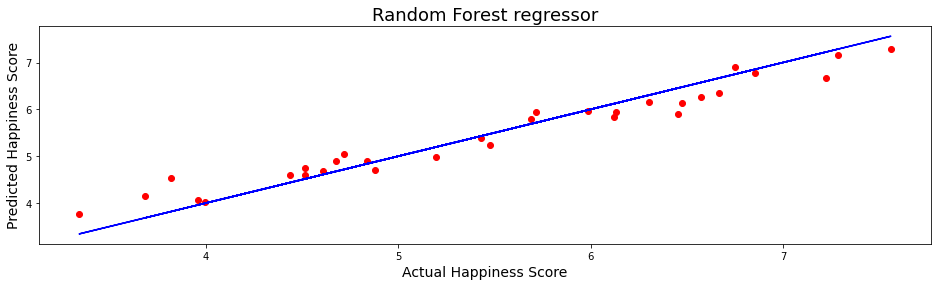

In [59]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

In [60]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'lad', 'n_estimators': 200}


In [61]:
gbr= GradientBoostingRegressor(criterion='mse',loss='lad',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_random = gbr.predict(xtest)

gbrs= r2_score(ytest,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=2)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 96.14919888549535
Cross Val Score: -352.6261888538346


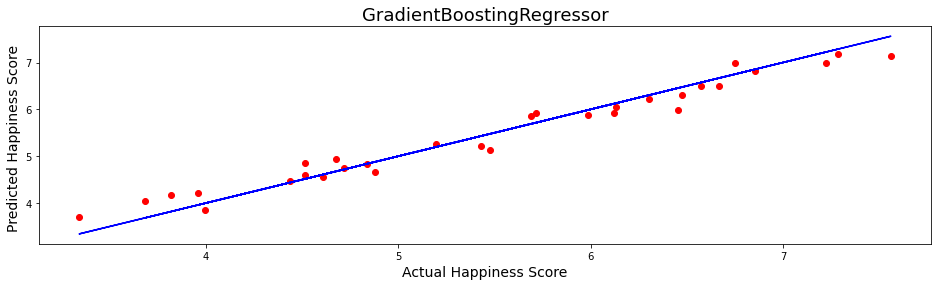

In [62]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score ',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

In [63]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale']}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'gamma': 'auto', 'kernel': 'linear'}


In [64]:
sv = SVR(kernel = 'linear', gamma = 'auto')
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

svs = r2_score(ytest,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x,y,cv=3)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 99.4432100854178
Cross Val Score: 90.36728840299922


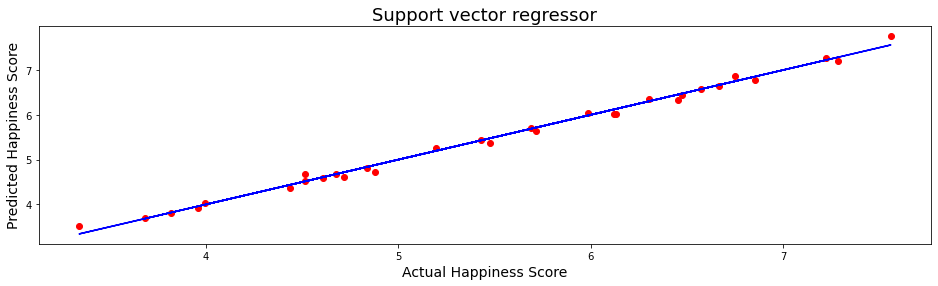

In [65]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


In [66]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'brute', 'weights': 'distance'}


In [67]:
kn = KNeighborsRegressor(algorithm = 'auto', weights = 'distance')
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

kns = r2_score(ytest,pred_vector)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=10)
kvc = knscore.mean() 
print('Cross Val Score:',kvc*2)

R2 Score: 99.4432100854178
Cross Val Score: -22.187502272403645


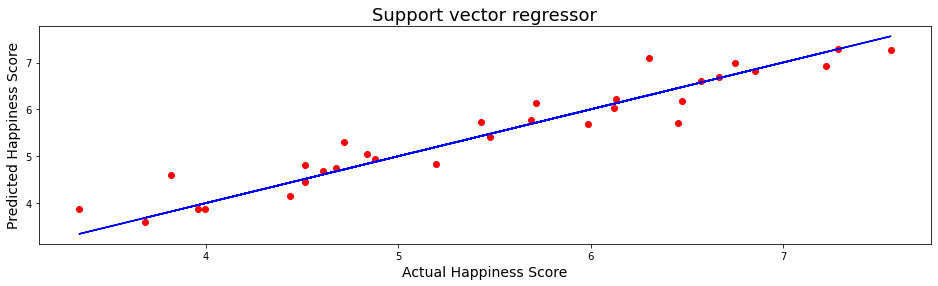

In [68]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

### The best model is Linear Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

### Model Saving:

In [69]:
import pickle
filename='World-Happiness-Score.pkl'
pickle.dump(lr,open(filename,'wb'))

### Conclusion:

In [70]:
import numpy as np
a=np.array(ytest)
predicted=np.array(lr.predict(xtest))
df_com=pd.DataFrame({"Original":a,"Predicted":predicted}, index=range(len(a) ))
df_com

,Original,Predicted
0,7.286,7.204750
1,6.574,6.597552
2,5.984,6.072212
3,3.956,3.955053
4,6.123,6.047559
5,6.130,6.044381
6,3.995,4.044063
7,6.302,6.356158
8,4.715,4.645750
9,4.517,4.690018


### As our model score is 100% our model performs very well.